# Import Python Libraries
## Libraries Used
##### Pandas
Data manipulation and analysis
##### MatPlotLib Pyplot
2D plotting
##### Numpy
Supports large, multi-dimensional arrays and matrix manipulation and high level mathematical functions on these arrays
##### Scipy Stats
Hypothesis testing

In [1]:
# Perform library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Import Data Dictionaries to Convert Codes to Descriptions

##### Sources

Non-Profit Data - NCSS Data Archive:  https://nccs-data.urban.org/dd2.php?close=1&form=BMF+08/2016

Region Data - https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

##### Non-Profit Method
* Created text files in json format within Visual Studio for each Data Dictionary
* Saved files to Resources folder
* Used pandas library to read the files into dataframes

In [2]:
# Import Level1 Data Dictionary and display : NOTE - This is only a break out of Public Charities
file_Level1 = "./Resources/NCSSDataDictLevel1.txt"
dict_Level1 = pd.read_json(file_Level1)
dict_Level1

,Description1
O,Other Nonprofits
PC,Public Charity
PF,Private Foundation
U,Unknown


In [3]:
# Import Region csv file
region_csv = './Resources/State_region.csv'
df_region = pd.read_csv(region_csv)
df_region

,STATE,REGION
0,ME,NORTHEAST
1,NH,NORTHEAST
2,MA,NORTHEAST
3,VT,NORTHEAST
4,NY,NORTHEAST
5,CT,NORTHEAST
6,RI,NORTHEAST
7,NJ,NORTHEAST
8,PA,NORTHEAST
9,OH,MIDWEST


### Import IRS Business Master Files

##### Source
NCSS Data Archive
https://nccs-data.urban.org/data.php?ds=bmf

##### File
bmf.bm1812.csv

In [4]:
# specify file name
gov_data_file = "./Resources/2018_BMF.csv"

# import file
gov_data = pd.read_csv(gov_data_file, low_memory=False)

# Display resulting dataframe header
gov_data.head()

,EIN,SEC_NAME,FRCD,SUBSECCD,TAXPER,ASSETS,INCOME,NAME,ADDRESS,CITY,...,LEVEL4,LEVEL1,NTMAJ10,MAJGRPB,LEVEL3,LEVEL2,NTMAJ12,NTMAJ5,FILER,ZFILER
0,19818,3514,60,3,NaN,NaN,NaN,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,...,X,PC,RE,X,RE,O,RE,OT,N,N
1,29215,NaN,60,3,NaN,NaN,NaN,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,...,X,PC,RE,X,RE,O,RE,OT,N,N
2,260049,NaN,60,3,NaN,NaN,NaN,CORINTH BAPTIST CHURCH,PO BOX 92,HOSFORD,...,X,PC,RE,X,RE,O,RE,OT,N,N
3,490336,NaN,60,3,NaN,NaN,NaN,EASTSIDE BAPTIST CHURCH,PO BOX 296,LABELLE,...,X,PC,RE,X,RE,O,RE,OT,N,N
4,587764,NaN,60,3,NaN,NaN,NaN,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,...,X,PC,RE,X,RE,O,RE,OT,N,N


# Data Cleaning Phase


In [5]:
gov_data.count()

EIN          1499450
SEC_NAME      404909
FRCD         1499450
SUBSECCD     1499450
TAXPER       1240366
ASSETS       1223112
INCOME       1223112
NAME         1499450
ADDRESS      1499450
CITY         1499450
STATE        1498426
NTEECONF        4518
NTEEFINAL    1499450
NAICS        1495191
ZIP5         1499353
OUTNCCS      1499450
OUTREAS         3021
RULEDATE     1499450
FIPS         1496643
FNDNCD       1499450
PMSA          506362
MSA_NECH     1175676
CASSETS       542418
CFINSRC       542418
CTAXPER       542418
CTOTREV       542418
ACCPER       1240366
RANDNUM      1499450
NTEECC       1499450
NTEE1        1499450
LEVEL4       1499450
LEVEL1       1499450
NTMAJ10      1499450
MAJGRPB      1499450
LEVEL3       1499450
LEVEL2       1499450
NTMAJ12      1499450
NTMAJ5       1499450
FILER        1499450
ZFILER       1499450
dtype: int64

In [6]:
# Select only the columns of data we need for analysis
gov_data = gov_data[["EIN", "CTOTREV", "CASSETS", "NAME", "CITY", "STATE", "NTMAJ10", "LEVEL1", "OUTNCCS"]]

In [7]:
# check the number of data rows per column
gov_data.count()

EIN        1499450
CTOTREV     542418
CASSETS     542418
NAME       1499450
CITY       1499450
STATE      1498426
NTMAJ10    1499450
LEVEL1     1499450
OUTNCCS    1499450
dtype: int64

In [8]:
# display the data read in
gov_data

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN
...,...,...,...,...,...,...,...,...,...
1499445,996089401,NaN,NaN,TOYO SAKUMOTO CHARITABLE TR,HONOLULU,HI,PU,PF,IN
1499446,996165005,NaN,NaN,INDEPENDENT ORDER OF ODD FELLOWS,CUPERTINO,CA,MU,O,IN
1499447,998010224,NaN,NaN,HAWAII FOUNDATION FOR THE BLIND,HONOLULU,HI,HU,PF,IN
1499448,998997790,NaN,NaN,CHAMPAIGN COUNTY EXTENSION EDUCATION FOUNDATION,TAYLORVILLE,IL,ED,PC,IN


In [9]:
indexNames = gov_data[gov_data["OUTNCCS"]!="IN"].index
len(indexNames)

3021

In [10]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN


In [11]:
gov_data.count()

EIN        1496429
CTOTREV     541062
CASSETS     541062
NAME       1496429
CITY       1496429
STATE      1496305
NTMAJ10    1496429
LEVEL1     1496429
OUTNCCS    1496429
dtype: int64

In [12]:
# identify the indices of rows we want to eliminate and display how many rows are found
indexNames = gov_data[gov_data["LEVEL1"]=="O"].index
len(indexNames)

348758

In [13]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN


In [14]:
# identify the indices of rows we want to eliminate and display how many rows
indexNames = gov_data[gov_data["LEVEL1"]=="U"].index
len(indexNames)

30

In [15]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN


In [16]:
# Determine if rows are even yet
gov_data.count()

EIN        1147641
CTOTREV     401062
CASSETS     401062
NAME       1147641
CITY       1147641
STATE      1147542
NTMAJ10    1147641
LEVEL1     1147641
OUTNCCS    1147641
dtype: int64

In [17]:
# drop invalid rows and display
gov_data.dropna(axis=0, how='any', inplace=True)
gov_data

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
20,10015091,109998.0,57145.0,HANOVER SOCCER CLUB INC,CEDAR KNOLLS,NJ,HU,PC,IN
21,10017496,110522.0,235622.0,AGAMENTICUS YACHT CLUB OF YORK,YORK HARBOR,ME,HU,PC,IN
36,10024645,1032510.0,1947235.0,BANGOR SYMPHONY ORCHESTRA,BANGOR,ME,AR,PC,IN
102,10130427,52152619.0,57577945.0,BRIDGTON HOSPITAL,LEWISTON,ME,HE,PC,IN
113,10133442,393145.0,824589.0,OXFORD COUNTY AGRICULTURAL SOCIETY,NORWAY,ME,HU,PC,IN
...,...,...,...,...,...,...,...,...,...
1499429,996064620,3893395.0,259000997.0,PARKER RANCH FOUNDATION TR 091092,KAMUELA,HI,PU,PC,IN
1499434,996074970,16088.0,280096.0,HONOLULU FIRE DEPARTMENT FIREMANS FUND FOUNDAT...,HONOLULU,HI,ED,PC,IN
1499436,996078202,0.0,1.0,JOSEPH CAMPBELL FOUNDATION ENDOWMENT TRUST,NEW YORK,NY,PU,PC,IN
1499437,996078252,568256.0,3843893.0,DAVID C AI CRAT 05051996,HONOLULU,HI,PU,PC,IN


In [18]:
# Determine the remaining count of rows and ensure our data set is full (no uneven row counts)
gov_data.count()

EIN        401031
CTOTREV    401031
CASSETS    401031
NAME       401031
CITY       401031
STATE      401031
NTMAJ10    401031
LEVEL1     401031
OUTNCCS    401031
dtype: int64

# Merge Region Data

In [19]:
# Merge Region and gov_data
gov_data = pd.merge(gov_data, df_region, on= "STATE", how="left")
gov_data

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS,REGION
0,10015091,109998.0,57145.0,HANOVER SOCCER CLUB INC,CEDAR KNOLLS,NJ,HU,PC,IN,NORTHEAST
1,10017496,110522.0,235622.0,AGAMENTICUS YACHT CLUB OF YORK,YORK HARBOR,ME,HU,PC,IN,NORTHEAST
2,10024645,1032510.0,1947235.0,BANGOR SYMPHONY ORCHESTRA,BANGOR,ME,AR,PC,IN,NORTHEAST
3,10130427,52152619.0,57577945.0,BRIDGTON HOSPITAL,LEWISTON,ME,HE,PC,IN,NORTHEAST
4,10133442,393145.0,824589.0,OXFORD COUNTY AGRICULTURAL SOCIETY,NORWAY,ME,HU,PC,IN,NORTHEAST
...,...,...,...,...,...,...,...,...,...,...
401026,996064620,3893395.0,259000997.0,PARKER RANCH FOUNDATION TR 091092,KAMUELA,HI,PU,PC,IN,WEST
401027,996074970,16088.0,280096.0,HONOLULU FIRE DEPARTMENT FIREMANS FUND FOUNDAT...,HONOLULU,HI,ED,PC,IN,WEST
401028,996078202,0.0,1.0,JOSEPH CAMPBELL FOUNDATION ENDOWMENT TRUST,NEW YORK,NY,PU,PC,IN,NORTHEAST
401029,996078252,568256.0,3843893.0,DAVID C AI CRAT 05051996,HONOLULU,HI,PU,PC,IN,WEST


# Save file

In [20]:
gov_data.to_csv(index=False, path_or_buf="./Resources/gov_data.csv")

# Review Basic Statistics of the Remaining Data
* Run basic statistics on the numeric columns


In [21]:
gov_data.describe()

,EIN,CTOTREV,CASSETS
count,4.010310e+05,4.010310e+05,4.010310e+05
mean,4.444546e+08,4.864175e+06,9.142071e+06
std,2.468442e+08,1.130662e+08,2.230186e+08
min,1.001509e+07,-7.906811e+07,-3.057337e+07
25%,2.601441e+08,4.041900e+04,2.568350e+04
50%,4.211267e+08,1.247180e+05,1.345950e+05
75%,5.921421e+08,5.429600e+05,8.546190e+05
max,9.960869e+08,4.846638e+10,7.351824e+10


# Beth's section - Visualization 1-3

In [22]:
bethdf=pd.read_csv("./Resources/gov_data.csv")
medians=bethdf.groupby(["REGION","LEVEL1"]).agg({'median'}).reset_index()
medians.values.tolist()
medians


,REGION,LEVEL1,EIN,CTOTREV,CASSETS
,,,median,median,median
0,MIDWEST,PC,370964193.5,130582.0,171237.5
1,MIDWEST,PF,382597740.0,32055.0,233340.5
2,NORTHEAST,PC,223236840.0,128860.0,162787.0
3,NORTHEAST,PF,256788940.0,35650.5,103147.5
4,SOUTH,PC,541459968.0,117983.0,116135.0
5,SOUTH,PF,465294746.0,21794.0,20009.0
6,WEST,PC,680362025.0,120796.0,103491.0
7,WEST,PF,464309410.5,28673.0,29364.5


In [23]:
df_medians = pd.DataFrame(medians)
df_medians



,REGION,LEVEL1,EIN,CTOTREV,CASSETS
,,,median,median,median
0,MIDWEST,PC,370964193.5,130582.0,171237.5
1,MIDWEST,PF,382597740.0,32055.0,233340.5
2,NORTHEAST,PC,223236840.0,128860.0,162787.0
3,NORTHEAST,PF,256788940.0,35650.5,103147.5
4,SOUTH,PC,541459968.0,117983.0,116135.0
5,SOUTH,PF,465294746.0,21794.0,20009.0
6,WEST,PC,680362025.0,120796.0,103491.0
7,WEST,PF,464309410.5,28673.0,29364.5


In [24]:
df = pd.DataFrame({"REGION": ["MIDWEST", "MIDWEST", "NORTHEAST", "NORTHEAST", "SOUTH", "SOUTH", "WEST", "WEST"],
                   "LEVEL1": ["PC", "PF", "PC", "PF","PC", "PF","PC", "PF"],
                   "EIN":    [370964193.5, 382597740.0, 223236840.0, 256788940.0, 541459968.0, 465294746.0, 680362025.0, 464309410.5],
                   "CTOTREV": [130582.0, 32055.0, 128860.0, 35650.5, 117983.0, 21784.0, 120796.0, 28673.0],
                   "CASSETS": [171237.5, 233340.5, 184787.0, 103147.5, 116135.0, 20009.0, 103491.0, 29364.5]})

In [25]:
ein_df = df[["REGION", "LEVEL1", "EIN"]].pivot(index="REGION", columns="LEVEL1", values="EIN")
ctotrev_df = df[["REGION", "LEVEL1", "CTOTREV"]].pivot(index="REGION", columns="LEVEL1", values="CTOTREV")
cassets_df = df[["REGION", "LEVEL1", "CASSETS"]].pivot(index="REGION", columns="LEVEL1", values="CASSETS")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

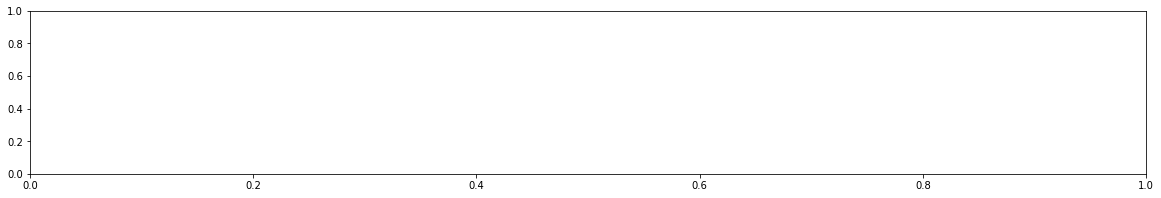

In [30]:

x_axis_rev = np.arange(len(ctotrev_df))
tick_locations = [value+0.4 for value in x_axis_rev]
plt.figure(figsize=(20,3))
plt.bar(x_axis_rev,df["CTOTREV"],color='r',alpha=0.5,align="edge")
plt.ticks(tick_locations,index,rotation="vertical")

In [ ]:
df_medians["CASSETS"],df_medians["CTOTREV"]

In [ ]:
df_medians.dtypes,df_medians.info()

In [ ]:
df_medians.rename(columns={'EIN, median':'EIN','CTOTREV, median':'Revenue','CASSETS, median':'Assets'})


In [ ]:

df_medians.pivot_table(index=['REGION','LEVEL1'],values=['']

In [ ]:
assets = [171237.5, 233340.5, 162787.0, 103147.5, 116135.0, 20009.0, 103491.0, 29364.5]
revenues = [130582.0, 32055.0, 128860.0, 35650.5, 117983.0, 21794.0, 120796.0, 28673.0]
# types = ['PC','PF','PC','PF','PC','PF','PC','PF']
index = ["MidwestPC","MidwestPF","NortheastPC","NortheastPF","SouthPC","SouthPF","WestPC","WestPF"]

assets_df = pd.DataFrame(assets, index=index)
ax = df_medians.plot.bar(rot=0)

In [ ]:

x_axis = np.arange(len(df_medians))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis,assets,color='r',alpha=0.5,align="edge")
plt.ticks(tick_locations,index,rotation="vertical")

In [ ]:
# df_medians["REGION"] = df_medians["REGION"].str.replace('/','')
# df_medians["LEVEL1"] = df_medians["LEVEL1"].str.replace('/','')
# df_medians.dtypes

In [ ]:
# d = {"REGION": ["MIDWEST","NORTHEAST","SOUTH","WEST"],
#      'colors': ['red','black','blue','dog']}

# keys = [k for k in d.keys() for v in d[k]]
# values = [v for k in d.keys() for v in d[k]]
# pd.DataFrame.from_dict({'index': keys, 'values': values})



In [ ]:

assets_bar=(bethdf.groupby(["REGION","LEVEL1"]).agg({"CASSETS":['median']})).reset_index()
assets_bar

In [ ]:
print(df_medians.index)

In [ ]:
print(bethdf.groupby(["REGION","LEVEL1"]).agg({"CTOTREV":['median']}))
print(bethdf.groupby(["REGION","LEVEL1"]).agg({"EIN":['count']}))

# Emile's section - Visualization 4

# Scott's section - Visualization 5

# Deanna section - Visualization 6-7

# Katherine's section - Hypothesis Testing